# Regularisation for Linear Regression

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include Lasso Regression, Ridge Regression and the Elastic Net. 

In this Assignment, you will be looking at Ridge Regression and devising equations to optimise the objective function in Ridge Regression using two methods: a closed-form derivation and the update rules for stochastic gradient descent. You will then use those update rules for making predictions on a Air Quaility dataset.

## Ridge Regression

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_n]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be a linear model

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

where $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$.

The **objective function** we are going to use has the following form

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$

where $\alpha>0$ is known as the *regularisation* parameter.

The first term on the right-hand side (rhs) of the expression for $J(\mathbf{w}, \alpha)$ is very similar to the least-squares objective function we have seen before, for example in Lab 3. The only difference is on the term $\frac{1}{n}$ that we use to normalise the objective with respect to the number of observations in the dataset. 

The first term on the rhs is what we call the "fitting" term whereas the second term in the expression is the regularisation term. Given $\alpha$, the two terms in the expression have different purposes. The first term is looking for a value of $\mathbf{w}$ that leads the squared-errors to zero. While doing this, $\mathbf{w}$ can take any value and lead to a solution that it is only good for the training data but perhaps not for the test data. The second term is regularising the behavior of the first term by driving the $\mathbf{w}$ towards zero. By doing this, it restricts the possible set of values that $\mathbf{w}$ might take according to the first term. The value that we use for $\alpha$ will allow a compromise between a value of $\mathbf{w}$ that exactly fits the data (first term) or a value of $\mathbf{w}$ that does not grow too much (second term).

This type of regularisation has different names: ridge regression, Tikhonov regularisation or $\ell_2$ norm regularisation. 


### Question 1: $J(\mathbf{w}, \alpha)$ in matrix form (2 marks)

Write the expression for $J(\mathbf{w}, \alpha)$ in matrix form. Include ALL the steps necessary to reach the expression.

#### Question 1 Answer

We want to express 
\begin{align*}
    \mathbf{J(w, \alpha)} = 
      \frac{1}{n} 
                \begin{bmatrix}
                        (y_1 -f(x_1))^2\\
                       \  (y_2 -f(x_2))^2\\
                          \vdots\\
                        (y_n -f(x_n))^2
                \end{bmatrix}
               +
               \frac{a}{2} 
               \begin{bmatrix}
                      \ w_0^{2}\\
                       \ w_1^{2}\\
                          \vdots\\
                        \ w_D^{2}
                \end{bmatrix}.
\end{align*}

We need to form a vector where the ith entry is f(x), this can be done with the design matrix.
The fitting term becomes:

$$
\frac{1}{n} (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}- \mathbf{X}\mathbf{w})
$$

The regularisation term is easily expressed as an inner product 


$$
\frac{a}{2} \mathbf{w}^T \mathbf{w}
$$

The final expression is therefore

$$
\mathbf{J(w, \alpha)} = \frac{1}{n} (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}- \mathbf{X}\mathbf{w}) + \frac{a}{2} \mathbf{w}^T \mathbf{w}
$$



## Optimising the objective function with respect to $\mathbf{w}$

There are two ways we can optimise the objective function with respect to $\mathbf{w}$. The first one leads to a closed form expression for $\mathbf{w}$ and the second one using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$ is the gradient of the objective function.

### Question 2: Derivative of $J(\mathbf{w}, \alpha)$ wrt $\mathbf{w}$ (2 marks)

Find the closed-form expression for $\mathbf{w}$ by taking the derivative of $J(\mathbf{w}, \alpha)$ with respect to 
$\mathbf{w}$, equating to zero and solving for $\mathbf{w}$. Write the expression in matrix form. 

Also, write down the specific update rule for $\mathbf{w}_{\text{new}}$ by using the equation above.


#### Question 2 Answer
$$
\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}} = \frac{2}{n}(- \mathbf{X}^T \mathbf{y} + \mathbf{X}^T \mathbf{X} \mathbf{w}) + \alpha \mathbf{w}      
$$


Setting the derivative  = 0 and solving for $\mathbf{w}$

 
$$ \mathbf{w} = 2 \frac{\mathbf{X}^T \mathbf{y}}{2\mathbf{X}^T\mathbf{X}+n\alpha\mathbf{I_{D+1}}}$$




$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \big(  \frac{2}{n}(- \mathbf{X}^T \mathbf{y} + \mathbf{X}^T \mathbf{X} \mathbf{w}_{\text{old}}) + \alpha \mathbf{w}_{\text{old}} \big)      
$$


# Using ridge regression to predict air quality

Our dataset comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We are going to use ridge regression for predicting air quality. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

In [33]:
import pods
pods.util.download_url('https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip')
import zipfile
zip = zipfile.ZipFile('./AirQualityUCI.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

[===========================   ]   1.328/1.472MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [2]:
# The .csv version of the file has some typing issues, so we use the excel version


We can see some of the rows in the dataset 

In [34]:
air_quality.sample(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1534,3.1,1287.75,-200,16.371624,1191.00,178.0,691.25,123.0,1910.25,1192.00,19.775,44.300001,1.010436
5373,-200.0,1537.50,-200,22.393233,1361.50,-200.0,472.75,-200.0,1924.25,1792.75,25.650,54.500000,1.768413
6043,4.2,1317.00,-200,19.017971,1268.75,905.0,553.75,205.0,1445.75,1679.00,14.675,38.925000,0.646213
5116,1.5,1181.00,-200,8.889612,935.00,158.0,701.25,62.0,1564.75,960.25,24.875,56.025000,1.736685
4537,6.7,1571.00,-200,31.809165,1592.75,615.0,469.25,173.0,2408.50,1686.00,25.075,55.825000,1.751055


The target variable corresponds to the CO(GT) variable of the first column. The following columns correspond to the variables in the feature vectors, *e.g.*, PT08.S1(CO) is $x_1$ up until AH which is $x_D$. The original dataset also has a date and a time columns that we are not going to use in this assignment.

Before designing our predictive model, we need to think about three stages: the preprocessing stage, the training stage and the validation stage. The three stages are interconnected and *it is important to remember that the testing data that we use for validation has to be set aside before preprocessing*. Any preprocessing that you do has to be done only on the training data and several key statistics need to be saved for the test stage.

Separating the dataset into training and test before any preprocessing has happened help us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

We are going to use *hold-out validation* for testing our predictive model so we need to separate the dataset into a training set and a test set.

### Question 3: Splitting the dataset (1 mark)

Split the dataset into a training set and a test set. The training set should have 70% of the total observations and the test set, the 30%. For making the random selection make sure that you use a random seed that corresponds to the last five digits of your student UCard. Make sure that you comment your code.

#### Question 3 Answer

In [1]:
import pandas as pd 
import numpy as np

air_quality = pd.read_excel('./AirQualityUCI.xlsx', usecols=range(2,15))
air_quality =  pd.DataFrame(air_quality, columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)','PT08.S3(NOx)', 'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'])

StudentID = 13983
np.random.seed(StudentID) # setting the random seed
Training_data_length = round(0.7 * air_quality.shape[0]) #returns 70% of the amount of records as a whole number 
Test_data_length = round(0.3 * air_quality.shape[0]) #Return 30% of the amount of records as a whole number


indexes_users = np.random.permutation(Training_data_length) #return a permuted range
my_batch_users_training = pd.DataFrame(np.zeros(shape= (Training_data_length,13)),columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)','PT08.S3(NOx)', 'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']) # make  a numpy array with length of training data inside a panda dataframe


my_batch_users_training = air_quality.iloc[indexes_users,0:15]  #add air quality data to my training matrix
   

##process is repeated for test data
indexes_users=np.random.permutation(Test_data_length)  
   
my_batch_users_testing = pd.DataFrame(np.zeros(shape= (Test_data_length,13)),columns =['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','C6H6', 'PT08.S2(NMHC)', 'NOx(GT)','PT08.S3(NOx)', 'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'])
my_batch_users_testing = air_quality.iloc[indexes_users,0:15]
    
my_batch_users_training.sample(10)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1829,-200.0,-200.00,-200,-200.000000,-200.00,-200.0,-200.00,-200.0,-200.00,-200.00,-200.000000,-200.000000,-200.000000
4108,-200.0,1059.25,-200,8.350804,913.50,-200.0,696.75,-200.0,1616.50,895.00,26.025000,47.650000,1.580582
4454,-200.0,1092.75,-200,6.557207,837.25,-200.0,829.50,-200.0,1479.75,1046.75,22.050000,55.349999,1.449521
1997,2.2,1170.75,-200,13.137205,1088.25,168.0,821.75,81.0,1889.25,1132.25,20.200000,65.150002,1.525104
422,1.3,1024.25,91,4.682892,747.25,105.0,1136.00,75.0,1382.00,897.25,9.650000,58.599998,0.703472
3384,-200.0,1080.75,-200,14.003886,1116.75,102.0,689.25,127.0,1668.25,828.00,35.749999,19.775001,1.139876
3728,0.7,853.25,-200,2.589178,625.50,22.0,1044.50,33.0,1556.50,515.50,26.650001,61.049999,2.100543
4993,-200.0,1722.75,-200,44.686104,1865.75,-200.0,378.25,-200.0,2611.50,2006.00,24.300000,49.599999,1.486031
5346,-200.0,1454.75,-200,26.534749,1467.50,-200.0,474.25,-200.0,1945.00,1745.75,19.425000,61.150000,1.365173
1637,1.3,1003.25,-200,7.357560,872.25,79.0,987.50,80.0,1439.00,851.00,20.200000,31.200000,0.730364


## Preprocessing the data

The dataset has missing values tagged with a -200 value. Before doing any work with the training data, we want to make sure that we deal properly with the missing values. 

### Question 4: Missing values (3 marks)

Make some exploratory analysis on the number of missing values per column in the training data. 

* Remove the rows for which the target feature has missing values. We are doing supervised learning so we need all our data observations to have known target values.

* Remove features with more than 20% of missing values. For all the other features with missing values, use the mean value of the non-missing values for imputation.

#### Question 4 Answer

In [2]:
my_batch_users_training = my_batch_users_training[my_batch_users_training['CO(GT)'] != -200] # delete any missing value in first col
missing_value_cap = (0.2 * my_batch_users_training.shape[0])

for column in my_batch_users_training: # iterate through each row by column
    if np.count_nonzero(column == -200) > missing_value_cap: #if the value is -200 
        del my_batch_users_training[column] #remove feature
        
mean = [] #empty list to store mean values
for column in my_batch_users_training:
    mean.append(float(my_batch_users_training.loc[my_batch_users_training[column] != -200,[column]].mean())) #take the mean for each column
i = 0  
for column in my_batch_users_training:
    my_batch_users_training.loc[my_batch_users_training[column] == -200, column] = mean[i] #if =-200 replace it with the mean
    i += 1
my_batch_users_training.sample(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
5167,1.0,897.50,223.641573,4.572351,741.500000,93.000000,914.50,50.00000,1345.000000,795.50,18.125000,65.175000,1.343018
2745,0.7,899.50,223.641573,4.726454,749.500000,208.129114,932.00,100.13574,1494.250000,817.00,21.750000,46.625000,1.199131
4023,2.9,1251.50,223.641573,15.621359,1168.000000,193.000000,556.50,107.00000,1937.500000,1352.25,28.100000,47.424999,1.775284
5143,1.4,1020.75,223.641573,5.982909,811.000000,135.000000,793.50,52.00000,1501.750000,836.75,20.200000,67.924999,1.590064
1776,1.4,1070.00,223.641573,6.844212,850.000000,94.000000,997.25,91.00000,1502.000000,778.25,24.750000,29.500000,0.907716
2172,1.0,934.50,223.641573,8.147875,905.250000,88.000000,899.00,69.00000,1675.250000,953.75,20.525000,54.750000,1.307293
6447,2.5,1148.00,223.641573,9.599605,962.500000,451.000000,679.50,102.00000,1394.500000,1016.50,12.200000,83.899998,1.188997
749,2.5,1219.75,235.000000,9.711401,966.750000,174.000000,843.50,117.00000,1545.000000,1218.50,11.825000,56.625000,0.783266
871,1.9,1188.50,110.000000,6.714130,844.250000,96.000000,886.75,93.00000,1565.500000,1048.75,13.450000,69.600000,1.068779
4842,3.8,1224.00,223.641573,21.837693,1346.666667,483.000000,602.00,176.00000,1669.666667,1901.00,26.433333,26.400000,0.896908


### Question 5: Normalising the training data (2 marks)

Now that you have removed the missing data, we need to normalise the input vectors. 

* Explain in a sentence why do you need to normalise the input features for this dataset.

* Normalise the training data by substracting the mean value for each feature and dividing the result by the standard deviation of each feature. Keep the mean values and standard deviations, you will need them at test time.

#### Question 5 Answer


Normalisation is required as the features have different ranges. 
One feature may influence the result more due to its larger value. It also means that the data will follow a gaussian distribution.

In [3]:
standard_deviation =[]
#means were calculated in previous question and will remain the same

for column in my_batch_users_training:
    standard_deviation.append(my_batch_users_training[column].std()) #calculate standard deviation for each column
    
i =0
for column in my_batch_users_training: # loops through each column and replaces each value with normalised value
    my_batch_users_training.loc[:,column] = (my_batch_users_training.loc[:,column]-mean[i])/standard_deviation[i] 
    i += 1

my_batch_users_training.sample(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1698,-0.094230,0.497228,0.000000,0.133781,0.285086,-0.464361,-0.230115,0.200009,0.356139,-0.376922,1.144695,-1.391498,-0.462083
6545,0.114360,0.443845,0.000000,-0.164196,-0.025167,0.825396,-0.604012,-0.130616,-0.747518,0.404184,-0.927050,0.913949,-0.349448
6164,1.018248,1.182115,0.000000,1.873683,1.744989,3.969845,-1.443797,3.480829,-0.155665,2.264995,-1.751851,0.101787,-1.764017
5541,0.462009,0.218957,0.000000,0.453592,0.591533,0.862703,-0.913615,0.327173,0.309302,0.350133,-0.245127,1.279710,1.185725
37,-0.511409,-0.082030,-2.219826,-0.879959,-0.934990,-0.528316,2.110205,0.098279,-0.761143,-0.727595,-1.946686,1.014749,-1.470341
4753,0.531539,-0.026376,0.000000,-0.064799,0.081423,0.452326,-0.464542,0.225442,-0.110531,-0.291890,-0.754945,1.626751,0.524467
6206,1.157308,1.388831,0.000000,1.018389,1.083560,2.712065,-1.273664,0.352606,0.202002,1.199791,-1.518049,1.901792,-0.503069
1742,0.044830,0.971992,0.000000,0.477386,0.613422,-0.368429,-0.622806,-0.156048,0.890084,0.686964,-0.274353,0.049946,-0.219764
5552,-0.859058,-1.101979,0.000000,-0.870020,-0.919762,-0.528316,0.180381,-1.402251,-0.971485,-0.669589,-0.862105,1.799552,0.474661
6430,1.713547,1.744336,0.000000,1.692741,1.611752,2.184437,-1.532820,1.268183,1.052737,1.801605,-0.313320,0.811709,0.542272


## Training and validation stages

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will use both the closed form expression for $\mathbf{w}$ and gradient descent for iterative optimisation. 

We first organise the dataframe into the vector of targets $\mathbf{y}$ and the design matrix $\mathbf{X}$.

In [38]:
# Write your code here to get y and X
y = my_batch_users_training.copy(deep = True )
del y['CO(GT)']
X = np.hstack((np.ones_like(my_batch_users_training['CO(GT)']), my_batch_users_training['CO(GT)']))

### Question 6: training with closed form expression for $\mathbf{w}$ (3 marks)

To find the optimal value of $\mathbf{w}$ using the closed form expression that you derived before, we need to know the value of the regularisation parameter $\alpha$ in advance. We will determine the value by using part of the training data for finding the parameters $\mathbf{w}$ and another part of the training data to choose the best $\alpha$ from a set of predefined values.

* Use `np.log(start, stop, num)` to create a set of values for $\alpha$ in log scale. Use the following parameters `start=-3`, `stop=2` and `num=20`. 

* Randomly split the training data into what is properly called the training set and the validation set. As before, make sure that you use a random seed that corresponds to the last five digits of your student UCard. Use 70% of the data for the training set and 30% of the data for the validation set.

* For each value that you have for $\alpha$ from the previous step, use the training set to compute $\mathbf{w}$ and then measure the mean-squared error (MSE) over the validation data. After this, you will have `num=20` MSE values. Choose the value of $\alpha$ that leads to the lower MSE and save it. You will use it at the test stage.

* What was the best value of $\alpha$? Is there any explanation for that?

#### Question 6 Answer

In [4]:
a = np.logspace(start=-3,stop=2,num=20)
#the seed has been set already

#training set
indexes_users = np.random.permutation(round(0.7 * my_batch_users_training.shape[0])) #return a permuted range
training_set = my_batch_users_training.iloc[indexes_users,0:13]  #add training data to my training set
xTrainingSet = training_set.iloc[:,1:]
ytrainingSet = training_set.iloc[:,0]
#xTrainingSet.insert(0,'ones', [1] * xTrainingSet.shape[0]) #make indexes match

#validation set
indexes_users = np.random.permutation(round(0.3 * my_batch_users_training.shape[0])) #return a permuted range
validation_set = my_batch_users_training.iloc[indexes_users,0:13]  #add training data to my training set
XValSet = validation_set.iloc[:,1:]
yValSet = validation_set.iloc[:,0]
#XValSet.insert(0,'ones',[1] * XValSet.shape[0]) #make indexes match

w = np.zeros(shape=(13, 1))
I = np.identity(xTrainingSet.shape[1])
i = 0


mse = [None] * 20

for j in range(20):
    w = np.linalg.solve(2 * np.dot(xTrainingSet.T,xTrainingSet) + ytrainingSet.size * a[j] *I,np.dot(xTrainingSet.T,ytrainingSet))
    mse[j] = (1/yValSet.size) * np.dot((np.dot(XValSet,w) - yValSet).T,np.dot(XValSet,w)- yValSet)                            


alpha = a[mse.index(min(mse))]
print("Best value of alpha is " + str(alpha))
     

Best value of alpha is 0.001


Since we are trying to minimise the objective function:
$$
\mathbf{J(w, \alpha)} = \frac{1}{n} (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}- \mathbf{X}\mathbf{w}) + \frac{a}{2} \mathbf{w}^T \mathbf{w}
$$
$ \mathbf{w}^T \mathbf{w}$ is always positive. $\mathbf{J(w, \alpha)} $ decreases with a smaller $ \alpha $.Therefore,the best value for $\alpha$ is going to the smallest value which is 0.001.

### Question 7: validation with the closed form expression for $\mathbf{w}$ (2 marks)

We are going to deal now with the test data to perform the validation of the model. Remember that the test data might also contain missing values in the target variable and in the input features.

* Remove the rows of the test data for which the labels have missing values. 
* If you remove any feature at the training stage, you also need to remove the same features from the test stage.
* Replace the missing values on each feature variables with the mean value you computed in the training data.
* Normalise the test data using the means and standard deviations computed from the training data
* Compute again $\mathbf{w}$ for the value of $\alpha$ that best performed on the validation set using ALL the training data (not all the training set).
* Report the MSE on the preprocessed test data and an histogram with the absolute error.
* Does the regularisation have any effect on the model? Explain your answer.

#### Question 7 Answer

MSE is 0.22749735213149352


Text(0.5, 0, 'Absolute Error')

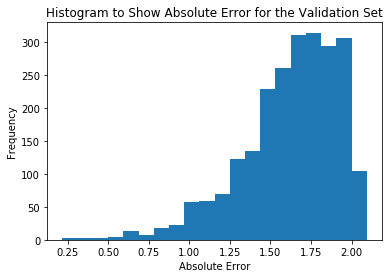

In [8]:
from matplotlib import pyplot as plt 
#1
my_batch_users_testing = my_batch_users_testing[my_batch_users_testing['CO(GT)'] != -200] # delete any missing value in first col

#2
#no features were removed from training stage

#3&4
i =0
for column in my_batch_users_testing:
    my_batch_users_testing.loc[my_batch_users_testing[column] == -200, column] = mean[i] #if =-200 replace it with the mean
    my_batch_users_testing.loc[:,column] = (my_batch_users_testing.loc[:,column]-mean[i])/standard_deviation[i]
    i += 1

XTestSet = my_batch_users_testing.iloc[:,1:]
yTestSet = my_batch_users_testing.iloc[:,0]
#XTestSet.insert(0,'ones',[1] * XTestSet.shape[0]) #make indexes match

XAlltrainingdata = air_quality.iloc[:,1:]
YAlltrainingdata = air_quality.iloc[:,0]
#XAlltrainingdata.insert(0,'ones',[1]* XAlltrainingdata.shape[0])

w2 = np.zeros(shape=(13, 1))
#5
I = np.identity(xTrainingSet.shape[1]) #identity matrix has to be same size as no of columns 
w2 = np.linalg.solve(2 * np.dot(XTestSet.T,XTestSet) + yTestSet.size *alpha* I,np.dot(XTestSet.T,yTestSet))

#6
absolute_error = [None] * XTestSet.shape[0] #list to store the absolute error values
mse2=  (1/XTestSet.size) * np.dot((np.dot(XTestSet,w2) - yTestSet).T,np.dot(XTestSet,w2)- yTestSet)
j=0
for j in range(yTestSet.shape[0]):
    absolute_error = abs(yTestSet - np.dot(XTestSet,w2))
print("MSE is " + str(mse2))
plt.hist(absolute_error,bins = 20) 
plt.title('Histogram to Show Absolute Error for the Validation Set')
plt.ylabel('Frequency')
plt.xlabel('Absolute Error')
 

Regularisation does have an effect on the model as it constrains the data and so minimises the adjusted loss function. This is desirable as it reduces the computational complexity and can stop overfitting of unseen data.

## Question 8: training with gradient descent and validation (5 marks)


Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set to compute the gradient, use a subset of $B$ datapoints in the training set. This is sometimes called minibatch gradient descent where $B$ is the size of the minibacth. When using gradient descent with minibatches, you need to find the best values for three parameters: $\eta$, the learning rate, $B$, the number of datapoints in the minibatch and $\alpha$, the regularisation parameter.

* As you did on Question 6, create a grid of values for the parameters $\alpha$ and $\eta$ using `np.logspace` and a grid of values for $B$ using np.linspace. Because you need to find 
 three parameters, start with `num=5` and see if you can increase it.

* Use the same training set and validation set that you used in Question 6.

* For each value that you have of $\alpha$, $\eta$ and $B$ from the previous step, use the training set to compute $\mathbf{w}$ using minibatch gradient descent and then measure the MSE over the validation data. For the minibatch gradient descent choose to stop the iterative procedure after $500$ iterations.

* Choose the values of $\alpha$, $\eta$ and $B$ that lead to the lower MSE and save them. You will use them at the test stage.

*3 marks of out of the 5 marks*


* Use the test set from Question 7 and provide the MSE obtained by having used minibatch training with the best values for $\alpha$, $\eta$ and $B$ over the WHOLE training data (not only the training set).

* Compare the performance of the closed form solution and the minibatch solution. Are the performances similar? Are the parameters $\mathbf{w}$ and $\alpha$ similar in both approaches? Please comment on both questions.

*2 marks of out of the 5 marks*

#### Question 8 Answer

In [17]:
num1 = 5
a2 = np.logspace(start = -3, stop = 2,num= num1)
n  = np.logspace(start = -3,stop = 2,num= num1)
b = np.linspace(start = 20 ,stop = 100,num = num1) # I choose 5 batches

iterations = 500
mse3 = [None] * num1
new_w = np.zeros(shape=(13, 1)) #defined a new w 
j= 0
for i in range(iterations):
    for j in range(num1):
        for k in range(int(b[j])):
              #temp = training_set.sample(frac=1).reset_index(drop=True)# the training data for batch sampling
            #temp_train= temp.iloc[0:int(b)]
            new_w = - n[j] * np.linalg.solve(2 * np.dot(xTrainingSet.T,xTrainingSet) + ytrainingSet.size* a[j] * I,np.dot(xTrainingSet.T,ytrainingSet))
            mse3[j] = (1/yValSet.size) * np.dot((np.dot(XValSet,new_w) - yValSet).T,np.dot(XValSet,new_w)- yValSet)          

#Report Best Values
best_mse3 = mse3[mse3.index(min(mse3))]
best_alpha = a2[mse3.index(min(mse3))]        
best_n = n[mse3.index(min(mse3))] # ideallly this should be fairly small but not so slow that the code takes long to run
best_b = b[mse3.index(min(mse3))]

print("Lowest MSE is " + str(best_mse3))
print("Best value of alpha is " + str(best_alpha))
print("Best value of n is " + str(best_n))
print("Best value of b is " + str(best_b))

for i in range(int(best_b)):
    best_w = - best_n * np.linalg.solve(2 * np.dot(XTestSet.T,XTestSet) + yTestSet.size * best_alpha * I,np.dot(XTestSet.T,yTestSet))

mse4 = (1/yTestSet.size) * np.dot((np.dot(XTestSet,best_w) - yTestSet).T,np.dot(XTestSet,best_w)- yTestSet)

print("MSE obtained using minibatch training over whole training data ", mse4)

Lowest MSE is 1.0343938428424555
Best value of alpha is 0.001
Best value of n is 0.001
Best value of b is 20.0
MSE obtained using minibatch training over whole training data  0.7852528975914652


The performances are not similiar, $\alpha$ is the same in both cases and so the regularisation of the data set is similiar. The only difference is that the model is trained with less input data and thus means that the model does generalise the data as well as closed loop. 

The MSE using closed loop was 0.22749735213149352 compared to 0.7852528975914652 for minibatch descent. Closed loop fits the validation data better. The performance is around 4 times better.